In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("Bank_Customer_Churn_Prediction.csv")

In [3]:
data.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
!pip install pandas_profiling
from pandas_profiling import ProfileReport
prof = ProfileReport(data)
prof.to_file(output_file = 'bank_churn.html')

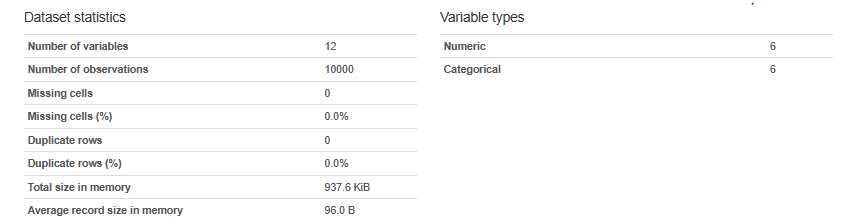

In [5]:
# 1. No missing values found
# 2 .No duplicate values

In [6]:
data.shape

(10000, 12)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [8]:
# As we can see there are 6 char values which need to be converted into numerical using label encoder
# char -- country,gender

In [9]:
data.columns

Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn'],
      dtype='object')

In [10]:
data['country'] = data['country'].astype('category')
data['country'] = data['country'].cat.codes

In [11]:
data['gender'] = data['gender'].astype('category')
data['gender'] = data['gender'].cat.codes

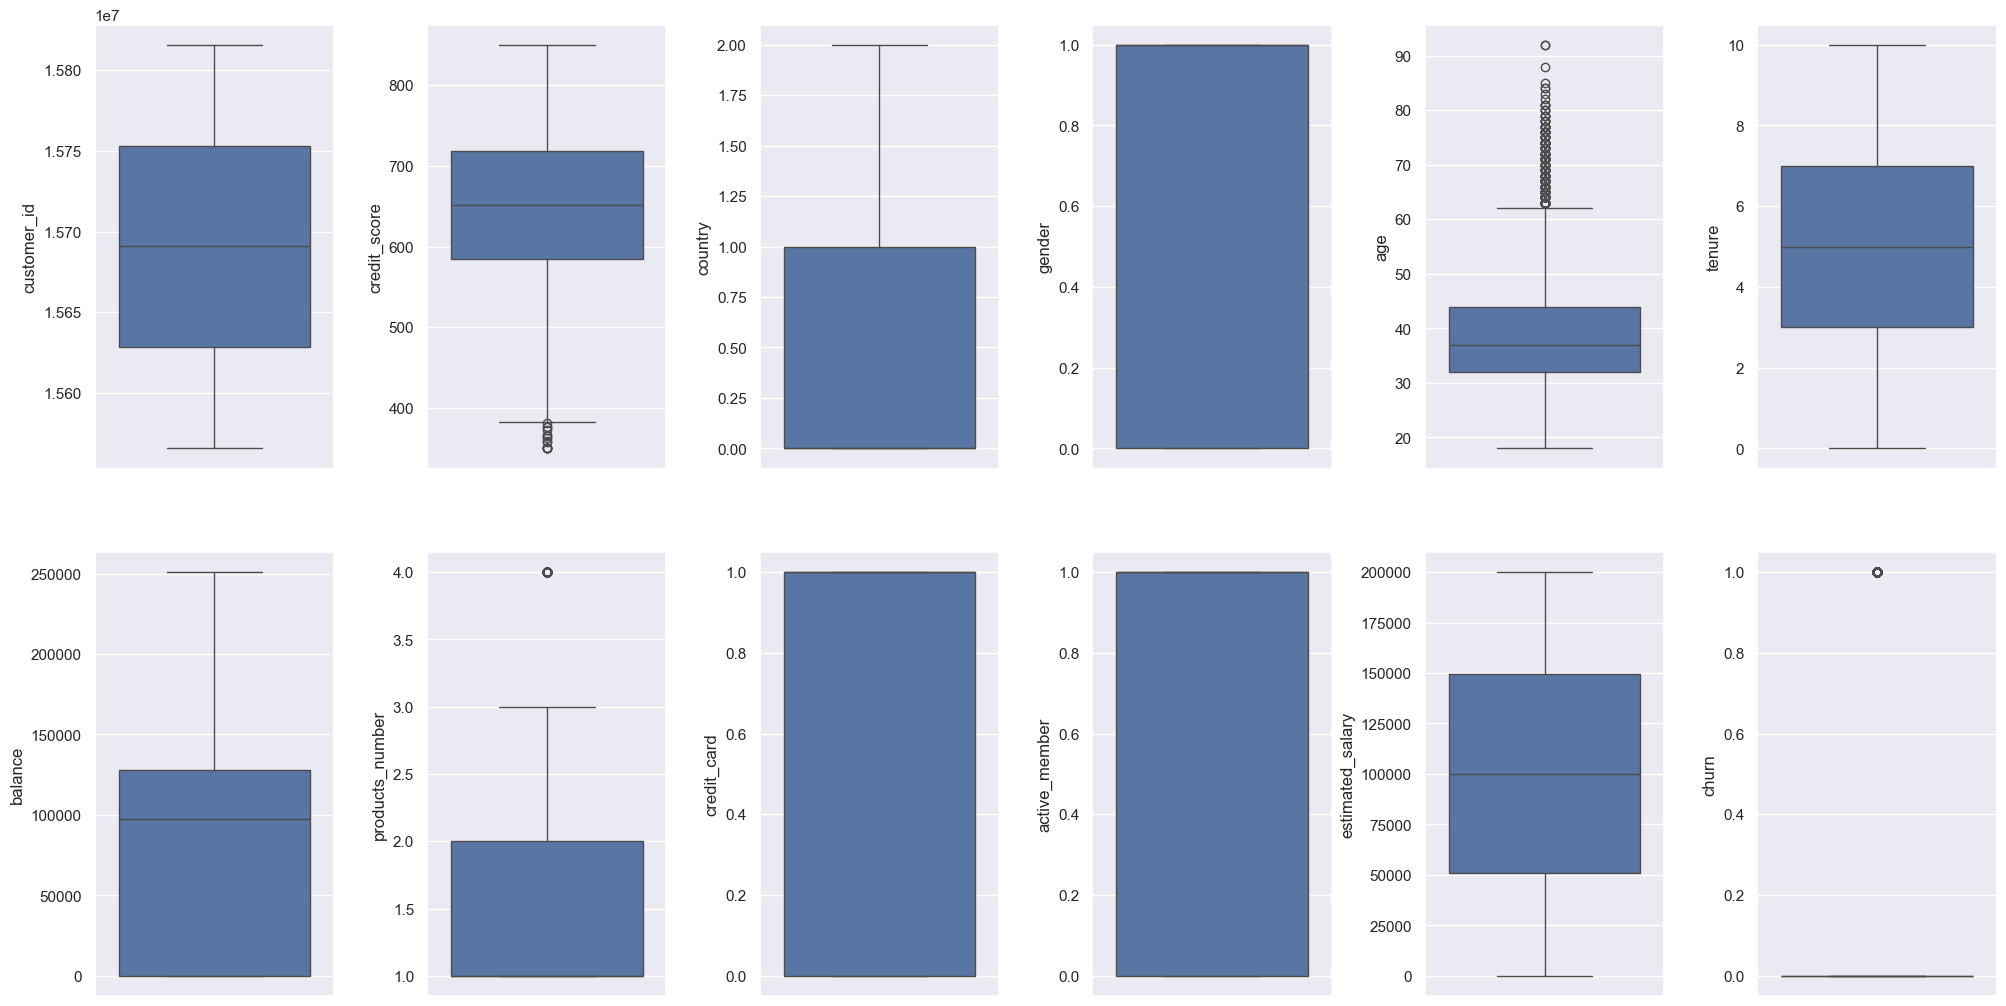

In [12]:
fig,axs = plt.subplots(ncols = 6,nrows =2, figsize=(20,10))
index = 0
axs = axs.flatten()
for k,v in data.items():
    sns.boxplot(y=k,data=data,ax = axs[index])
    index += 1
plt.tight_layout(pad = 0.4,w_pad=0.5,h_pad = 5.0)

In [13]:
data = data.drop('customer_id',axis = 1)

In [14]:
data

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,772,1,1,42,3,75075.31,2,1,0,92888.52,1


In [15]:
data = pd.get_dummies(columns = ['country'],data =data)

In [16]:
data = data.drop(['country_0'],axis = 1)

In [17]:
corr = data.corr()

<Axes: >

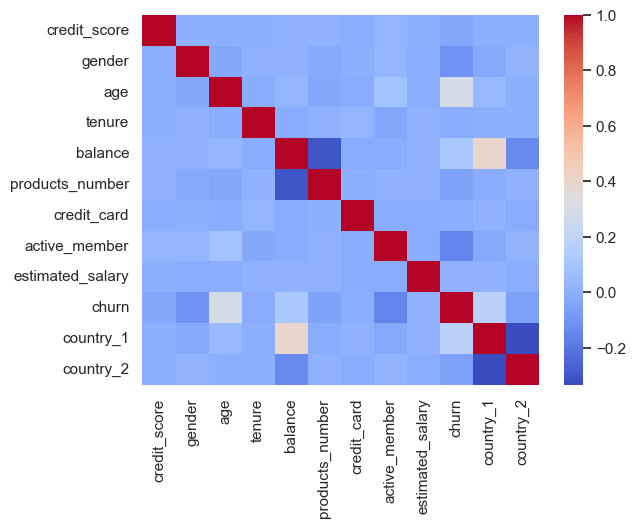

In [18]:
sns.heatmap(corr,cmap = 'coolwarm')

In [19]:
# Splitting data into dependent(y) and independent variables(x)
x = data.drop('churn',axis =1)
y = data['churn']

In [20]:
# feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaler = scaler.fit_transform(x)

In [21]:
x = pd.DataFrame(x_scaler,columns = x.columns[:])

In [22]:
# Checking for imbalanced data
y.value_counts()

churn
0    7963
1    2037
Name: count, dtype: int64

In [23]:
# handling imbalance data
from imblearn.over_sampling import RandomOverSampler
ROS = RandomOverSampler()
x_ros,y_ros = ROS.fit_resample(x,y)

In [24]:
y_ros.value_counts()

churn
1    7963
0    7963
Name: count, dtype: int64

In [25]:
bank = pd.concat([x_ros,y_ros],axis=1)
print(bank.head())

   credit_score    gender       age    tenure   balance  products_number  \
0     -0.326221 -1.095988  0.293517 -1.041760 -1.225848        -0.911583   
1     -0.440036 -1.095988  0.198164 -1.387538  0.117350        -0.911583   
2     -1.536794 -1.095988  0.293517  1.032908  1.333053         2.527057   
3      0.501521 -1.095988  0.007457 -1.387538 -1.225848         0.807737   
4      2.063884 -1.095988  0.388871 -1.041760  0.785728        -0.911583   

   credit_card  active_member  estimated_salary  country_1  country_2  churn  
0     0.646092       0.970243          0.021886  -0.578736  -0.573809      1  
1    -1.547768       0.970243          0.216534  -0.578736   1.742740      0  
2     0.646092      -1.030670          0.240687  -0.578736  -0.573809      1  
3    -1.547768      -1.030670         -0.108918  -0.578736  -0.573809      0  
4     0.646092       0.970243         -0.365276  -0.578736   1.742740      0  


In [26]:
bank[:-1]

,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,country_1,country_2,churn
0,-0.326221,-1.095988,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886,-0.578736,-0.573809,1
1,-0.440036,-1.095988,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534,-0.578736,1.742740,0
2,-1.536794,-1.095988,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687,-0.578736,-0.573809,1
3,0.501521,-1.095988,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918,-0.578736,-0.573809,0
4,2.063884,-1.095988,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276,-0.578736,1.742740,0
...,...,...,...,...,...,...,...,...,...,...,...,...
15920,0.149730,-1.095988,0.579578,-0.004426,1.265529,0.807737,0.646092,-1.030670,-0.838468,1.727904,-0.573809,1
15921,-0.978068,0.912419,0.674932,-0.695982,0.885964,-0.911583,0.646092,0.970243,0.146249,-0.578736,1.742740,1
15922,0.170424,-1.095988,1.628468,1.032908,0.977303,-0.911583,0.646092,-1.030670,0.534826,1.727904,-0.573809,1
15923,-1.019455,0.912419,-0.564665,-0.695982,1.097486,-0.911583,0.646092,-1.030670,-0.717216,1.727904,-0.573809,1


In [27]:
bank.to_csv('bank_file.csv')

In [28]:
bank.columns

Index(['credit_score', 'gender', 'age', 'tenure', 'balance', 'products_number',
       'credit_card', 'active_member', 'estimated_salary', 'country_1',
       'country_2', 'churn'],
      dtype='object')

In [29]:
# split data into training and testing data

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_ros,y_ros,test_size = 0.25,random_state = 1)

In [30]:
# Building the model
from sklearn.ensemble import RandomForestClassifier
rforest = RandomForestClassifier(n_estimators=500, criterion='entropy')
rforest.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=500)

In [31]:
y_pred_train = rforest.predict(x_train)
y_pred_test = rforest.predict(x_test)

In [32]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [33]:
print("Training accuracy:",accuracy_score(y_train,y_pred_train))
print("Test accuracy:",accuracy_score(y_test,y_pred_test))

Training accuracy: 1.0
Test accuracy: 0.9447513812154696


In [34]:
print('*********** Train ***********')
print(confusion_matrix(y_train,y_pred_train))
print('*********** Test ***********')
print(confusion_matrix(y_test,y_pred_test))

*********** Train ***********
[[6040    0]
 [   0 5904]]
*********** Test ***********
[[1747  176]
 [  44 2015]]


In [35]:
print('************************ Train ***********************')
print(classification_report(y_train,y_pred_train))
print('************************ Test ***********************')
print(classification_report(y_test,y_pred_test))

************************ Train ***********************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6040
           1       1.00      1.00      1.00      5904

    accuracy                           1.00     11944
   macro avg       1.00      1.00      1.00     11944
weighted avg       1.00      1.00      1.00     11944

************************ Test ***********************
              precision    recall  f1-score   support

           0       0.98      0.91      0.94      1923
           1       0.92      0.98      0.95      2059

    accuracy                           0.94      3982
   macro avg       0.95      0.94      0.94      3982
weighted avg       0.95      0.94      0.94      3982



In [36]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

              Method Used  Accuracy
0      LogisticRegression  0.697891
1            DecisionTree  0.912607
2            RandomForest  0.946258
3  Support Vector Machine  0.787042
4     K Nearest Neighbors  0.809141
5     Naive Bayes Theorem  0.710196
6                  Voting  0.846308
Axes(0.125,0.11;0.775x0.77)


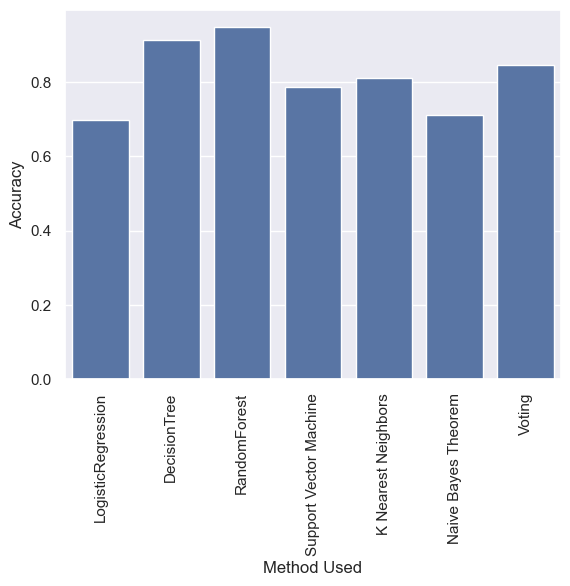

In [37]:
list_met = []
list_accuracy = []

# Logistic Regression
logit = LogisticRegression()
logit = logit.fit(x_train, y_train)
y_pred_lr = logit.predict(x_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)

# DecisionTree
dt = DecisionTreeClassifier()
dt = dt.fit(x_train, y_train)
y_pred_dt = dt.predict(x_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

# RandomForestClassifier
rf = RandomForestClassifier()
rf = rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# SVC
svc = SVC()
svc = svc.fit(x_train, y_train)
y_pred_svc = svc.predict(x_test)
accuracy_svc = accuracy_score(y_test, y_pred_svc)

# KNeighborsClassifier
knn = KNeighborsClassifier()
knn = knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

# GaussianNB
nb = GaussianNB()
nb = nb.fit(x_train, y_train)
y_pred_nb = nb.predict(x_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)

# Combining all the above model with voting classifier
model_evc = VotingClassifier(estimators=[('logit', logit),('dt',dt),('rf', rf),('svc', svc),('knn', knn),('nb', nb)], voting='hard')
model_evc1 = model_evc.fit(x_train, y_train)
pred_evc = model_evc.predict(x_test)
accuracy_evc = accuracy_score(y_test, pred_evc)

list1 = ['LogisticRegression','DecisionTree','RandomForest','Support Vector Machine','K Nearest Neighbors','Naive Bayes Theorem','Voting']

list2 = [accuracy_lr, accuracy_dt, accuracy_rf, accuracy_svc, accuracy_knn, accuracy_nb, accuracy_evc]

df_accuracy = pd.DataFrame({'Method Used': list1, "Accuracy": list2})

print(df_accuracy)

chart = sns.barplot(x = 'Method Used', y='Accuracy', data=df_accuracy)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
print(chart)

In [38]:
pred_evc_train = model_evc.predict(x_train)
pred_evc_test = model_evc.predict(x_test)

accuracy_evc_training = accuracy_score(y_train, pred_evc_train)
accuracy_evc_test = accuracy_score(y_test, pred_evc_test)

print(accuracy_evc_training)
print("***********************************************")
print(accuracy_evc_test)

0.8969356999330208
***********************************************
0.8463083877448518
